In [1]:
#Dependencies for analysis with pandas and numpy
import pandas as pd
import numpy as np

#Dependencies for graphs
import seaborn as sns
import matplotlib.pyplot as plt

#Dependencies for plotly
import plotly.graph_objs as plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

#Dependencies for stat analysis with sklearn
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split


In [2]:
#Import data
wine_df = pd.read_csv('winemag-data-130k-v2.csv')
wine_df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


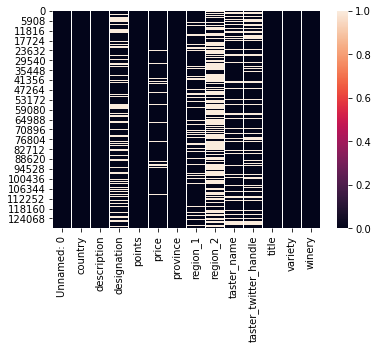

(129971, 14)

In [3]:
#Visualize the initial dataset
wine_df.info()
#See how many values are null
sns.heatmap(wine_df.isnull())
plt.show()
#See how many rows and columns
wine_df.shape

In [4]:
#get dupes information
wine_df[wine_df.duplicated('description',keep=False)].sort_values('description').count()

Unnamed: 0               20026
country                  20018
description              20026
designation              14162
points                   20026
price                    18814
province                 20018
region_1                 16648
region_2                  7498
taster_name              17362
taster_twitter_handle    16482
title                    20026
variety                  20026
winery                   20026
dtype: int64

In [5]:
null_columns=wine_df.columns[wine_df.isnull().any()]
wine_df[null_columns].isnull().sum()

country                     63
designation              37465
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
variety                      1
dtype: int64

In [6]:
print(wine_df[wine_df["country"].isnull()][null_columns])

       country                                  designation  price province  \
913        NaN                               Asureti Valley   30.0      NaN   
3131       NaN                                     Partager    NaN      NaN   
4243       NaN                     Red Naturally Semi-Sweet   18.0      NaN   
9509       NaN               Theopetra Malagouzia-Assyrtiko   28.0      NaN   
9750       NaN                    Orange Nikolaevo Vineyard   28.0      NaN   
11150      NaN                                          NaN   20.0      NaN   
11348      NaN                                     Partager    NaN      NaN   
14030      NaN                                        Márga   25.0      NaN   
16000      NaN            Valle de los Manantiales Vineyard   40.0      NaN   
16749      NaN      Cape Winemakers Guild Vloekskoot Wooded    NaN      NaN   
18075      NaN                                    Askitikos   17.0      NaN   
26485      NaN                                      

In [7]:
print(wine_df[wine_df["price"].isnull()][null_columns])

             country                           designation  price  \
0              Italy                          Vulkà Bianco    NaN   
13             Italy                                 Rosso    NaN   
30            France                               Nouveau    NaN   
31             Italy          Calanìca Nero d'Avola-Merlot    NaN   
32             Italy              Calanìca Grillo-Viognier    NaN   
50             Italy                                Scialo    NaN   
54             Italy                                 Rosso    NaN   
79          Portugal                                Bridão    NaN   
137     South Africa                       Hope Marguerite    NaN   
159            Italy                          Filo di Seta    NaN   
163           France  Hospices Civils de Romanèche Thurins    NaN   
182            Italy                              M. Vigna    NaN   
194            Italy                                   NaN    NaN   
200            Italy              

In [8]:
#It won't make sense to substitute null price values with exponential smoothing or a simple average. It ranges from $15 to $235
wine_df['designation']="Vigna Piaggia"
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vigna Piaggia,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Vigna Piaggia,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",Vigna Piaggia,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Vigna Piaggia,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vigna Piaggia,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Vigna Piaggia,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Vigna Piaggia,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,Vigna Piaggia,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Vigna Piaggia,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Vigna Piaggia,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [9]:
wine_df['country']="Italy"
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vigna Piaggia,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Italy,"This is ripe and fruity, a wine that is smooth...",Vigna Piaggia,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,Italy,"Tart and snappy, the flavors of lime flesh and...",Vigna Piaggia,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,Italy,"Pineapple rind, lemon pith and orange blossom ...",Vigna Piaggia,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,Italy,"Much like the regular bottling from 2012, this...",Vigna Piaggia,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Italy,Blackberry and raspberry aromas show a typical...,Vigna Piaggia,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Vigna Piaggia,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,Italy,This dry and restrained wine offers spice in p...,Vigna Piaggia,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Italy,Savory dried thyme notes accent sunnier flavor...,Vigna Piaggia,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,Italy,This has great depth of flavor with its fresh ...,Vigna Piaggia,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [10]:
print(wine_df[wine_df.isnull().any(axis=1)][null_columns].head())

  country    designation  price           province             region_1  \
0   Italy  Vigna Piaggia    NaN  Sicily & Sardinia                 Etna   
1   Italy  Vigna Piaggia   15.0              Douro                  NaN   
3   Italy  Vigna Piaggia   13.0           Michigan  Lake Michigan Shore   
5   Italy  Vigna Piaggia   15.0     Northern Spain              Navarra   
6   Italy  Vigna Piaggia   16.0  Sicily & Sardinia             Vittoria   

  region_2         taster_name taster_twitter_handle             variety  
0      NaN       Kerin O’Keefe          @kerinokeefe         White Blend  
1      NaN          Roger Voss            @vossroger      Portuguese Red  
3      NaN  Alexander Peartree                   NaN            Riesling  
5      NaN   Michael Schachner           @wineschach  Tempranillo-Merlot  
6      NaN       Kerin O’Keefe          @kerinokeefe            Frappato  


In [11]:
#Explore the duplicates
wine_df[wine_df.duplicated('description',keep=False)].sort_values('description').head(6)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
67614,67614,Italy,"100% Malbec, it's redolent with dark plums, wi...",Vigna Piaggia,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
46540,46540,Italy,"100% Malbec, it's redolent with dark plums, wi...",Vigna Piaggia,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
119702,119702,Italy,"100% Sangiovese, this pale pink wine has notes...",Vigna Piaggia,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
72181,72181,Italy,"100% Sangiovese, this pale pink wine has notes...",Vigna Piaggia,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
73731,73731,Italy,"87-89 Barrel sample. A pleasurable, perfumed w...",Vigna Piaggia,88,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Lalande-Borie 2008 Barrel sample (Sai...,Bordeaux-style Red Blend,Château Lalande-Borie
100745,100745,Italy,"87-89 Barrel sample. A pleasurable, perfumed w...",Vigna Piaggia,88,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Lalande-Borie 2008 Barrel sample (Sai...,Bordeaux-style Red Blend,Château Lalande-Borie


In [12]:
wine_df.shape

(129971, 14)

In [13]:
#Drop duplicates with the same description
wine_df1 = wine_df.drop_duplicates('description')
wine_df1.shape

(119955, 14)

In [14]:
wine_df2 = wine_df1[pd.notnull(wine_df1.price)]
wine_df2.shape

(111567, 14)

In [15]:
wine_df3 = wine_df2[pd.notnull(wine_df1.variety)]
wine_df3.shape

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(111566, 14)

In [16]:
null_columns=wine_df3.columns[wine_df3.isnull().any()]
wine_df3[null_columns].isnull().sum()

province                    55
region_1                 18010
region_2                 65007
taster_name              23267
taster_twitter_handle    27750
dtype: int64

In [17]:
cleaned_wine = wine_df3.drop(['Unnamed: 0'],axis =1)
cleaned_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Italy,"This is ripe and fruity, a wine that is smooth...",Vigna Piaggia,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,Italy,"Tart and snappy, the flavors of lime flesh and...",Vigna Piaggia,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,Italy,"Pineapple rind, lemon pith and orange blossom ...",Vigna Piaggia,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,Italy,"Much like the regular bottling from 2012, this...",Vigna Piaggia,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Italy,Blackberry and raspberry aromas show a typical...,Vigna Piaggia,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Vigna Piaggia,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,Italy,This dry and restrained wine offers spice in p...,Vigna Piaggia,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Italy,Savory dried thyme notes accent sunnier flavor...,Vigna Piaggia,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,Italy,This has great depth of flavor with its fresh ...,Vigna Piaggia,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
10,Italy,"Soft, supple plum envelopes an oaky structure ...",Vigna Piaggia,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature


In [18]:
wine = cleaned_wine[["title","variety","points","price","winery","country","province","region_1","region_2","taster_name","taster_twitter_handle","designation","description" ]]
wine

,title,variety,points,price,winery,country,province,region_1,region_2,taster_name,taster_twitter_handle,designation,description
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,87,15.0,Quinta dos Avidagos,Italy,Douro,NaN,NaN,Roger Voss,@vossroger,Vigna Piaggia,"This is ripe and fruity, a wine that is smooth..."
2,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,87,14.0,Rainstorm,Italy,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Vigna Piaggia,"Tart and snappy, the flavors of lime flesh and..."
3,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,87,13.0,St. Julian,Italy,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,Vigna Piaggia,"Pineapple rind, lemon pith and orange blossom ..."
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,87,65.0,Sweet Cheeks,Italy,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Vigna Piaggia,"Much like the regular bottling from 2012, this..."
5,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,87,15.0,Tandem,Italy,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Vigna Piaggia,Blackberry and raspberry aromas show a typical...
6,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,87,16.0,Terre di Giurfo,Italy,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Vigna Piaggia,"Here's a bright, informal red that opens with ..."
7,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,87,24.0,Trimbach,Italy,Alsace,Alsace,NaN,Roger Voss,@vossroger,Vigna Piaggia,This dry and restrained wine offers spice in p...
8,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,87,12.0,Heinz Eifel,Italy,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Vigna Piaggia,Savory dried thyme notes accent sunnier flavor...
9,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,87,27.0,Jean-Baptiste Adam,Italy,Alsace,Alsace,NaN,Roger Voss,@vossroger,Vigna Piaggia,This has great depth of flavor with its fresh ...
10,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,87,19.0,Kirkland Signature,Italy,California,Napa Valley,Napa,Virginie Boone,@vboone,Vigna Piaggia,"Soft, supple plum envelopes an oaky structure ..."


In [19]:
wine.shape

(111566, 13)

In [20]:
wine.to_json("winemag.js",orient='records')

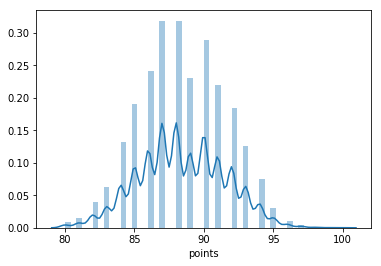

In [21]:
sns.distplot(wine_df2['points'])
plt.show()

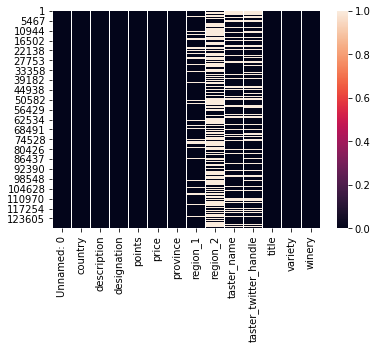

In [22]:
sns.heatmap(wine_df2.isnull())
plt.show()

In [39]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111566 entries, 1 to 129970
Data columns (total 13 columns):
title                    111566 non-null object
variety                  111566 non-null object
points                   111566 non-null int64
price                    111566 non-null float64
winery                   111566 non-null object
country                  111566 non-null object
province                 111511 non-null object
region_1                 93556 non-null object
region_2                 46559 non-null object
taster_name              88299 non-null object
taster_twitter_handle    83816 non-null object
designation              111566 non-null object
description              111566 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 16.9+ MB


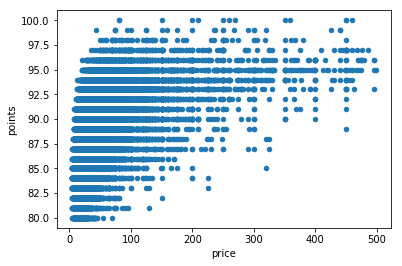

In [40]:
wine[wine['price'] < 500].plot.scatter(x='price', y='points')
plt.show()

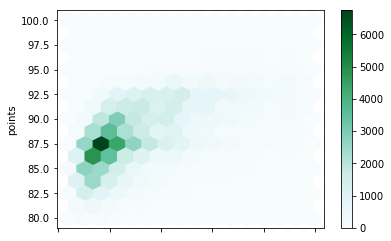

In [41]:
wine[wine['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)
plt.show()

In [42]:
iplot([plotly.Scatter(x=wine.head(1000)['points'], y=wine.head(1000)['price'], mode='markers')])

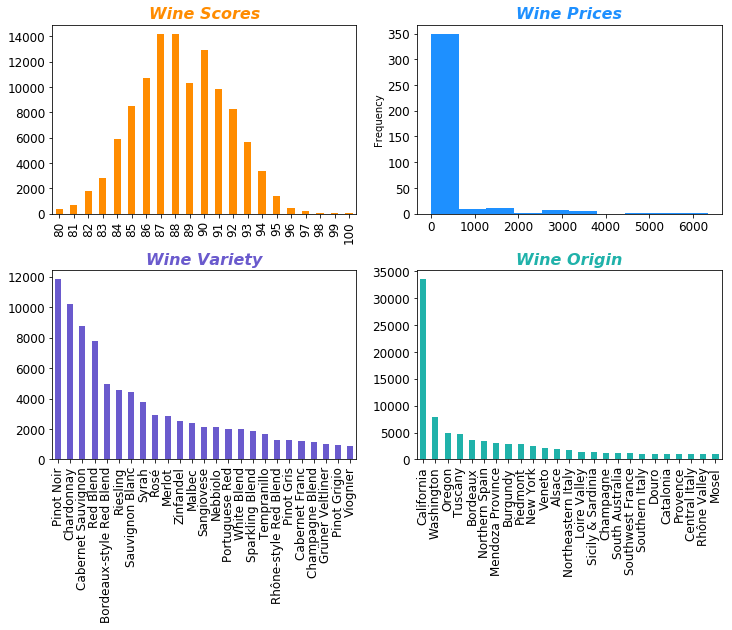

In [43]:
#subplots return 2 things: figure = fig and an array of the axes contained = axarr. Here are multiple rows and columns so the axes array becomes a list of lists 
#axarr
#fig
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

wine['points'].value_counts().sort_index().plot.bar(ax=axarr[0][0], fontsize=12, color='darkorange')
axarr[0][0].set_title("Wine Scores", fontsize=16,style = 'italic', color ='darkorange', weight = 'bold')

wine['price'].value_counts().plot.hist(ax=axarr[0][1], fontsize=12, color='dodgerblue')
axarr[0][1].set_title("Wine Prices", fontsize=16, style = 'italic', color ='dodgerblue', weight = 'bold')

wine['variety'].value_counts().head(25).plot.bar(ax=axarr[1][0], fontsize=12, color='slateblue')
axarr[1][0].set_title("Wine Variety", fontsize=16, style = 'oblique', color ='slateblue', weight = 'bold')

wine['province'].value_counts().head(25).plot.bar(ax=axarr[1][1], fontsize=12, color='lightseagreen')
axarr[1][1].set_title("Wine Origin", fontsize=16, style = 'italic', color = 'lightseagreen',  weight = 'bold')

plt.subplots_adjust(hspace=.3)
plt.show()

In [45]:
df = wine['country'].replace("US", "United States").value_counts()

iplot([plotly.Choropleth(
    locationmode='country names',
    locations=df.index.values,
    text=df.index,
    z=df.values
)])

In [46]:
wine['country'].value_counts()

Italy    111566
Name: country, dtype: int64

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning:

Attribute 'is_copy' is deprecated and will be removed in a future version.

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning:

Attribute 'is_copy' is deprecated and will be removed in a future version.



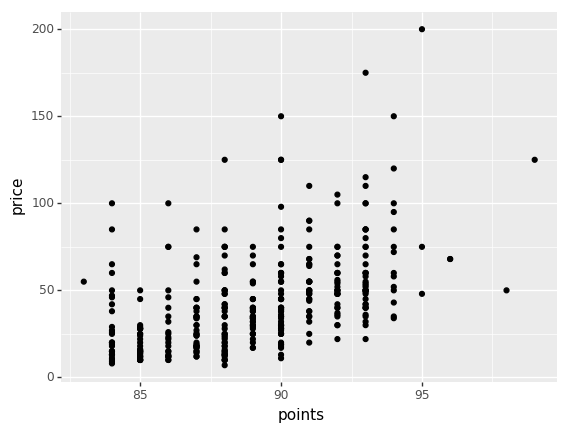

<ggplot: (-9223372036566599869)>

In [29]:
from plotnine import *
top_varieties = wine_df2[wine_df2['variety'].isin(wine_df2['variety'].value_counts().head(5).index)]
df = top_varieties.head(1000).dropna()

df = top_varieties.head(1000).dropna()

(ggplot(df)
 + aes('points', 'price')
 + geom_point())

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning:

Attribute 'is_copy' is deprecated and will be removed in a future version.

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning:

Attribute 'is_copy' is deprecated and will be removed in a future version.

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.



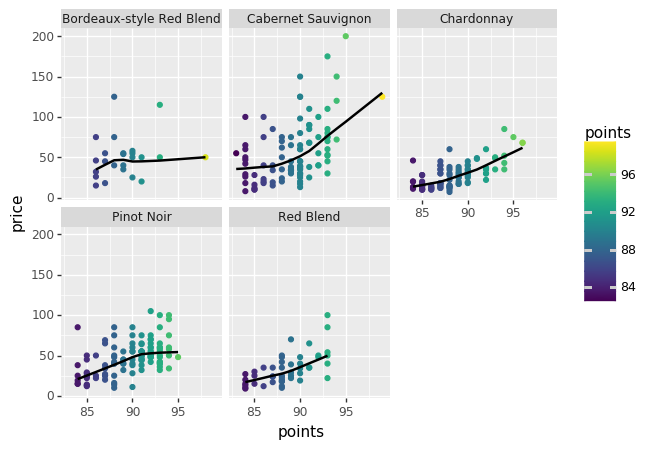

<ggplot: (302288171)>

In [30]:
df = top_varieties.head(1000).dropna()

(ggplot(df)
     + aes('points', 'price')
     + aes(color='points')
     + geom_point()
     + stat_smooth()
     + facet_wrap('~variety')
)

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning:

Attribute 'is_copy' is deprecated and will be removed in a future version.

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning:

Attribute 'is_copy' is deprecated and will be removed in a future version.



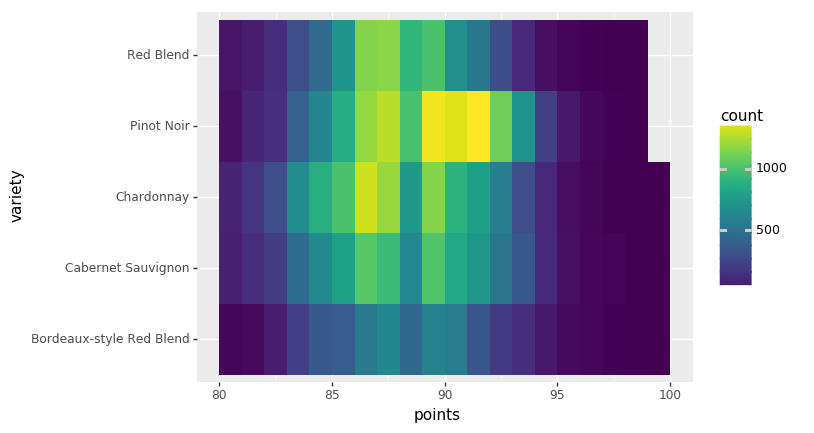

<ggplot: (-9223372036552246240)>

In [31]:
(ggplot(top_varieties)
     + aes('points', 'variety')
     + geom_bin2d(bins=20)
)

In [32]:
import squarify
x = wine_df2.groupby(['country',])['price'].count().sort_values(ascending=False).to_frame()
x2=x.head(13)

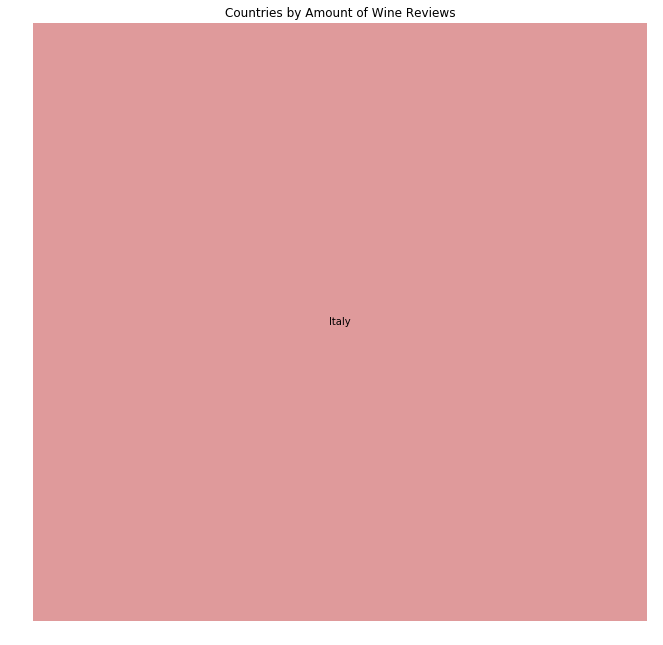

In [33]:
fig,ax = plt.subplots(1,1,figsize=(11,11))
squarify.plot(sizes=x2.values, label=x2.index.values, alpha=0.5, ax=ax, color=sns.color_palette('RdBu'))
plt.axis('off')
plt.title('Countries by Amount of Wine Reviews')
plt.show()

In [34]:
print('Number of country list in data:',wine_df2['country'].nunique())
# wine_country = wine_df2.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()
# wine_country2= wine_country.dropna()
# plt.figure(figsize=(12,8))
# sns.pointplot(x = wine_df2['price'] ,y = wine_df2['country'] ,color='b',orient='h',markers='o')
# plt.title('Country wise average wine price')
# plt.xlabel('Price')
# plt.ylabel('Country')

Number of country list in data: 1


In [35]:
summary_df = wine_df2.groupby(['country','province','points'])['price'].agg(
    ['count','min','max','mean']).sort_values(by = 'mean',ascending = False)[:30]
#summary_df.reset_index(inplace = True)
summary_df.style.highlight_max()

Pearson Correlation (r): (0.41656615517995887, 0.0)
                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                 8.455e+04
Date:                Wed, 06 Jun 2018   Prob (F-statistic):               0.00
Time:                        22:20:22   Log-Likelihood:            -6.2696e+05
No. Observations:              111567   AIC:                         1.254e+06
Df Residuals:                  111566   BIC:                         1.254e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


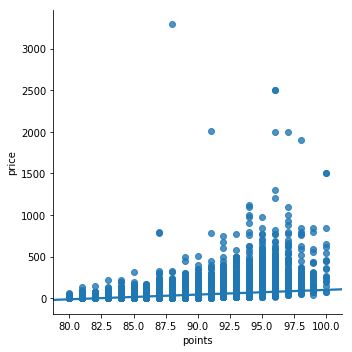

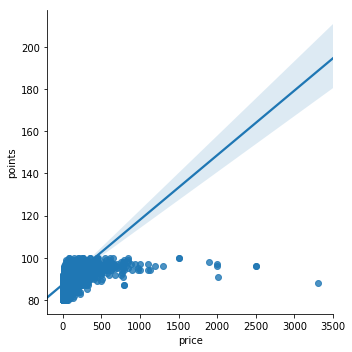

In [36]:
from scipy.stats import pearsonr
import statsmodels.api as sm
#import seaborn as sns; sns.set(color_codes=True)
cleaned_wine = wine_df2[pd.notnull(wine_df2.price)]
#cleaned_wine.shape
print("Pearson Correlation (r):", pearsonr(cleaned_wine.points, cleaned_wine.price))
reg = sm.OLS(cleaned_wine.points, cleaned_wine.price).fit()
print(reg.summary())
print('Parameters: ', reg.params)
print('Standard errors: ', reg.bse)
print('Predicted values: ', reg.predict())
sns.lmplot(y = 'price', x='points', data=cleaned_wine, palette='Set1')
sns.lmplot(y = 'points', x='price', data=cleaned_wine, palette='r')
plt.show()
#1.18 increase of the price for every point increased in the rating. 
#statistically highly significant p < 0.001. Significant correlation between points and price

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



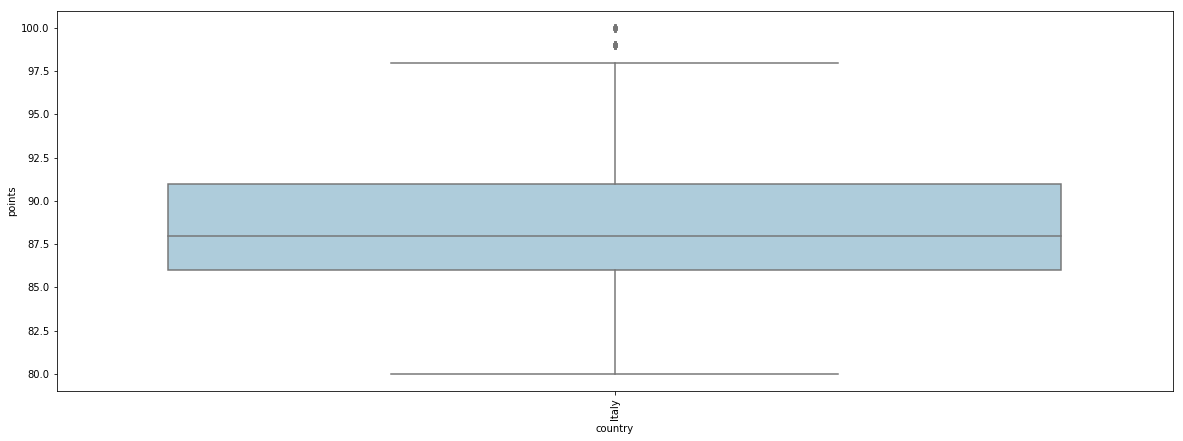

In [37]:
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=cleaned_wine, ax = ax, palette = 'Paired')
plt.xticks(rotation = 90)
plt.show()

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



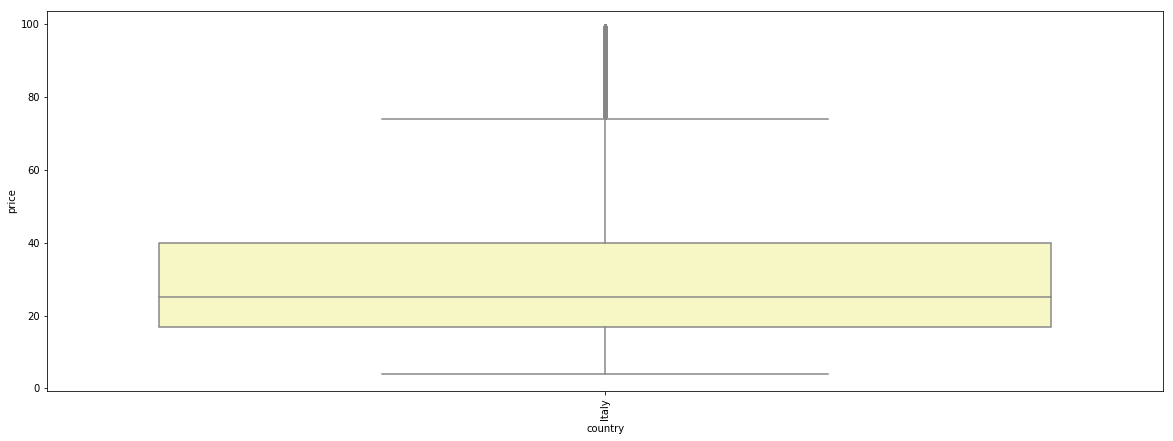

In [38]:
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='price', data=wine_df2[wine_df2['price'] < 100], ax = ax, palette = 'Spectral')
plt.xticks(rotation = 90)
plt.show()